# Modelo de clusterizacion para Segmentación de Vinos Utilizando KMeans y Reducción de Dimensionalidad con PCA.


## Autor: Mateo Londoño Rúa  [LinkedIn](https://www.linkedin.com/in/mateo-londono-rua117/)

Este enfoque combina la técnica de clusterización KMeans con el análisis de componentes principales (PCA) para identificar y agrupar diversos tipos de vinos según sus características químicas y sensoriales, a continuación, comparto una descripción de las variables que se encuentran en el dataset.


* **Alcohol**: Contenido de alcohol en el vino, expresado en porcentaje (%).
* **Malic**: Cantidad de ácido málico en el vino, un ácido orgánico que influye en el sabor y la acidez.
* **Ash**: Cantidad de cenizas (residuos sólidos) presentes en el vino, relacionada con los minerales.
* **Alcalinity**: Alcalinidad de las cenizas, una medida de la capacidad del vino para neutralizar ácidos.
* **Magnesium**: Contenido de magnesio en el vino, un mineral esencial que afecta el sabor.
* **Phenols**: Cantidad total de compuestos fenólicos, que contribuyen al sabor, color y cuerpo del vino.
* **Flavanoids**: Subgrupo de fenoles, asociados a propiedades antioxidantes y el sabor astringente del vino.
* **Nonflavanoids**: Fenoles no flavonoides, que también afectan el sabor, pero en menor medida que los flavonoides.
* **Proanthocyanins**: Tipo de taninos, compuestos responsables de la textura y astringencia en el vino.
* **Color**: Intensidad del color del vino, medida de la concentración del color.
* **Hue**: Matiz del color del vino, relacionado con la tonalidad del mismo.
* **Dilution**: Medida de la dilución óptica del vino, también llamada “OD280/OD315 de vinos diluidos”, que evalúa la cantidad de compuestos fenólicos.
* **Proline**: Contenido de prolina, un aminoácido relacionado con la estructura del vino y el sabor.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('caracteristicas de vinos.csv')

In [4]:
df

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Es fundamental asegurarse de que no existan datos faltantes o nulos en el DataFrame, ya que la presencia de valores nulos puede afectar negativamente los análisis y modelos que construyamos.

In [6]:
df.isnull().sum()

Vino               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Eliminamos la columna que define el tipo de Vino ya que no la necesitamos para el entrenamiento de nuestro modelo

In [7]:
df = df.drop('Vino', axis = 1)

In [8]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Escalamos los datos para transformar las características numéricas, esto permite que las variables tengan una escala similar, lo que permite que cada variable contribuya de manera equitativa al resultado final del modelo.

In [9]:
from sklearn.preprocessing import MinMaxScaler


esc = MinMaxScaler()
df_escalado = esc.fit_transform(df)


In [10]:
df_escalado

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

Acontinuacion inplementamos la tecnica del codo, esta se utiliza para identificar el número óptimo de clusters en un conjunto de datos. Consiste en graficar la suma de errores cuadráticos (SSE) frente a diferentes números de clusters. El "codo" en la gráfica indica el punto donde la adición de más clusters ya no mejora significativamente el modelo, ayudando a evitar el sobreajuste

<Axes: >

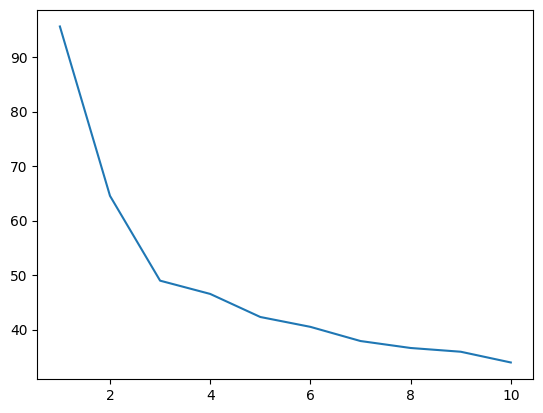

In [11]:
from  sklearn.cluster import KMeans

modelo_KMeans = KMeans()

#prueba dle codo

inercias = []

for i in np.arange(1,11):
    modelo_KMeans = KMeans(i,max_iter=300)
    inercias.append(modelo_KMeans.fit(df_escalado).inertia_)

sns.lineplot( x = np.arange(1,11) , y = inercias)    


Con base en los resultados obtenidos del método del codo, hemos determinado que el número óptimo de clusters para nuestro conjunto de datos es 4. Ahora procederemos a crear el modelo de clusterización utilizando el algoritmo KMeans

In [12]:
Clustering = KMeans(3, max_iter=300)
Clustering.fit(df_escalado)


KMeans(n_clusters=3)

In [13]:
df['KMeans_Clustering'] = Clustering.labels_

In [14]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clustering
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [15]:
df['KMeans_Clustering'].value_counts()

KMeans_Clustering
1    65
2    62
0    51
Name: count, dtype: int64

Implementamos el Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad de nuestro conjunto de datos. Esta técnica nos permite simplificar la representación de nuestros datos manteniendo la mayor cantidad posible de información relevante

In [16]:
#vamos a usar el pca para reduccion de dimencionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_PCA = pca.fit_transform(df_escalado)
df_PCA = pd.DataFrame( data = df_PCA, columns= ['Componente_1','Componente_2'])

In [24]:
print('  Componente_1   Componente_2')
print((pca.explained_variance_ratio_))
print('')
print('  Sums:  ')
print(np.sum(pca.explained_variance_ratio_))

  Componente_1   Componente_2
[0.40749485 0.18970352]

  Sums:  
0.5971983633884053


In [17]:
df_PCA

,Componente_1,Componente_2
0,0.706336,0.253193
1,0.484977,0.008823
2,0.521172,0.189187
3,0.821644,0.580906
4,0.202546,0.059467
...,...,...
173,-0.739510,0.471901
174,-0.581781,0.348366
175,-0.626313,0.546857
176,-0.572991,0.425516


In [18]:
df_PCA_KMeans = pd.concat([df_PCA,df[['KMeans_Clustering']]],axis=1)
df_PCA_KMeans

,Componente_1,Componente_2,KMeans_Clustering
0,0.706336,0.253193,1
1,0.484977,0.008823,1
2,0.521172,0.189187,1
3,0.821644,0.580906,1
4,0.202546,0.059467,1
...,...,...,...
173,-0.739510,0.471901,0
174,-0.581781,0.348366,0
175,-0.626313,0.546857,0
176,-0.572991,0.425516,0


En El siguiente gráfico de dispersión muestra la distribución de los datos proyectados en las dos primeras componentes principales obtenidas a través de PCA (Análisis de Componentes Principales).
En este gráfico, el eje X representa la primera componente principal y el eje Y la segunda, mientras que el color (hue) indica la asignación de cada punto a diferentes clusters
determinados por el algoritmo KMeans. Esto permite visualizar cómo se agrupan los diferentes tipos de datos en función de sus características, facilitando la identificación de patrones 
y relaciones entre los clusters.

<Axes: xlabel='Componente_1', ylabel='Componente_2'>

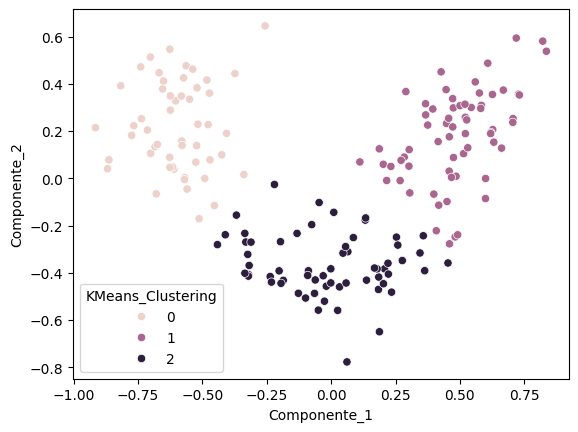

In [19]:
sns.scatterplot( x = df_PCA_KMeans['Componente_1'] , y = df_PCA_KMeans['Componente_2'], hue = df_PCA_KMeans['KMeans_Clustering'] )

In [20]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clustering
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [21]:
vars = df.columns.tolist()
vars

['Alcohol',
 'Malic',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline',
 'KMeans_Clustering']

En este grafico podemos viasualizar la siguiente informacion:

* **Visualizar la reducción de dimensionalidad**: PCA convierte datos de alta dimensión a un espacio de menor dimensión (en este caso, 2 dimensiones) para poder visualizar relaciones en los datos de forma más simple.

* **Interpretar la influencia de las variables originales**: Las flechas muestran cómo las variables originales contribuyen a las nuevas componentes. Esto permite interpretar la relación entre las variables y cómo influyen en la dispersión de los datos.

* **Puntos de dispercion**: Los puntos dispersos muestran las proyecciones de los datos originales en este nuevo espacio de menor dimensión, facilitando la visualización de la variabilidad en los datos

* **Identificar patrones o agrupaciones**: Al reducir la dimensionalidad, es más fácil detectar grupos, patrones o tendencias en los datos.

* **Evaluar la varianza explicada**: Al observar las componentes principales, se puede evaluar cuánta varianza en los datos originales es capturada por las primeras dos dimensiones. Esto es crucial para entender la efectividad del PCA en la representación de la estructura de los datos.



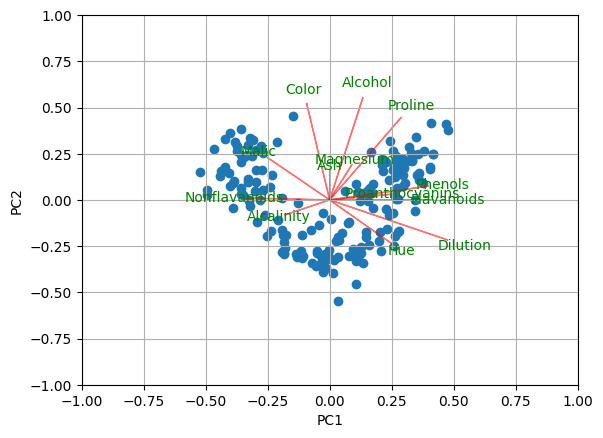

In [26]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
#myplot(df_PCA[:,0:2],np.transpose(pca.components_[0:2, :]), vars)
# Si df_PCA es un DataFrame de pandas
myplot(df_PCA.iloc[:, 0:2].values, np.transpose(pca.components_[0:2, :]), vars)

plt.show()